## **模型的评价指标**

对学习的泛化性能做评估, 不仅需要找到可行的实验估计方法, 还需要找到一个评价模型泛化能力的评价指标, **又叫做性能度量**(performance measure)

#### **1. 回归模型的评价指标**

模型的评价指标用来衡量模型在训练集或者测试集上的泛化性能, 对于回归模型常用的评价指标是MSE均方误差

**MAE平均绝对误差**: 对异常值不敏感, 适合于数据具有某些异常值的情况

$$
MAE = \frac{1}{n} \sum_{i=1}^{n} |f(x_i) - y_i|
$$

**MSE均方误差**: 对异常值敏感, 适用于惩罚大误差的场景

$$
MSE = \frac{1}{n} \sum_{i=1}^{n} (f(x_i) - y_i)^2
$$

**RMSE均方根误差**: 量纲与目标变量一致， 适用于直观误差量纲的场景, 一味的减小RMSE会造成过拟合

$$
RMSE = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (f(x_i) - y_i)^2}
$$

**R^2决定系数**: 衡量模型的解释能力, 值越接近1代表模型解释能力越好

$$
R^2 = 1 - \frac{\sum_{i=1}^{n} (f(x_i) - y_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2}
$$

对公式的理解: 分母是标签的方差, 分子是MSE, 设想一个场景如果标签本身混有噪声方差很大, 那么我们希望对模型的结果具有包容度, 此时方差很大所以MSE适当的过大不会影响我们评价模型的解释能力, 整体上分母变大分子页相应变大对解释能力评价并不产生影响, 对模型很包容

#### **2. 分类模型的评价指标**

**混淆矩阵**: 混淆矩阵是用来评估分类模型性能的工具, 展示了模型预测结果与真实标签的对比情况

|              | 预测：正例            | 预测：负例            |
|--------------|------------------------|------------------------|
| 实际：正例   | 真正例 **TP** (True Positive) | 假负例 **FN** (False Negative) |
| 实际：负例   | 假正例 **FP** (False Positive) | 真负例 **TN** (True Negative) |

In [21]:
import pandas as pd
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [22]:
# 定义标签
label = ['猫', '狗']

In [23]:
# 定义真实值与预测值
y_true = ['猫', '猫', '猫', '猫', '猫', '猫', '狗', '狗', '狗', '狗']
y_pred = ['猫', '猫', '狗', '猫', '猫', '猫', '猫', '猫', '狗', '狗']

In [24]:
metrics = confusion_matrix(y_true, y_pred, labels=label)
print(pd.DataFrame(metrics, columns=label, index=label))

   猫  狗
猫  5  1
狗  2  2


<Axes: >

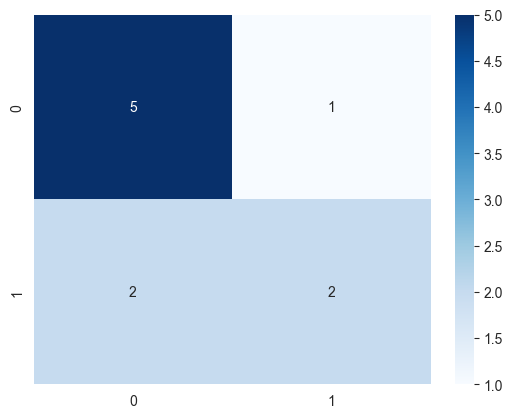

In [25]:
sns.heatmap(metrics, annot=True, fmt='d', cmap='Blues')

准确率: 模型预测正确的样本数占所有预测样本的比例

In [9]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_true, y_pred))

0.7


精确率: 模型预测为正例的样本中实际是正例的比例

In [11]:
from sklearn.metrics import precision_score
print(precision_score(y_true, y_pred, pos_label='猫'))
print(precision_score(y_true, y_pred, pos_label='狗'))

0.7142857142857143
0.6666666666666666


召回率: 实际为正例的样本中预测为正例的比例, 也叫查全率

In [12]:
from sklearn.metrics import recall_score
print(recall_score(y_true, y_pred, pos_label='猫'))
print(recall_score(y_true, y_pred, pos_label='狗'))

0.8333333333333334
0.5


F1分数: 精确率和召回率的调和平均数

In [14]:
from sklearn.metrics import f1_score
print(f1_score(y_true, y_pred, pos_label='猫'))
print(f1_score(y_true, y_pred, pos_label='狗'))

0.7692307692307693
0.5714285714285714


评估报告

In [16]:
from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred, labels=label, target_names=None))

              precision    recall  f1-score   support

           猫       0.71      0.83      0.77         6
           狗       0.67      0.50      0.57         4

    accuracy                           0.70        10
   macro avg       0.69      0.67      0.67        10
weighted avg       0.70      0.70      0.69        10



**ROC 曲线**

- **真正例率TPR**: 实际为正例, 被预测为正例的比例, 即为召回率
- **假正例率FPR**: 实际为负例, 被预测为正例的比例
- **阈值**: 根据阈值将概率转换为标签

$$TPR = \frac{TP}{\text{实际正例数}} = \frac{TP}{TP + FN}$$

$$FPR = \frac{FP}{\text{实际负例数}} = \frac{FP}{FP + TN}$$

**ROC曲线**是评估二分类模型性能的工具, 横坐标为FPR, 纵坐标为TPR, 展示不同阈值下模型的表现

绘制ROC的过程中从高到低遍历所有阈值, 计算TPR和FPR, 绘制所有点连接成曲线

理解: 对于ROC来说不断减小阈值, 被判断为正类的概率越大, 在阈值大于0.5判断为正类的正确率较为有把握, 所以真正类率较大函数图像呈现下凹趋势, 当小于0.5时虽然判断正类的概率更大了但是准确性有所下降, 函数会呈现一个上凸趋势, 但整体上随着阈值的下降, TPR和FPR都会上升, 因为可被预测的样本数一直在增多, 那么预测的正确与否也随之增多直到最后阈值变得极小, 导致几乎所有的样本都被认为是正例, FN和TN为0

**AUC值**:

AUC代表ROC曲线下面积, AUC值越大模型性能越好, AUC值越接近0.5证明是一次随机分类, AUC值为1证明是完美模型

